<a href="https://colab.research.google.com/github/valesierrai/Analitica-de-Negocios/blob/main/Reto5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se cargan las librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Mounted at /content/drive


1. Se procede con la carga de la base de datos

In [ ]:
XDB=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analítica de Negocios/6. Taller 5 - Longitudinal Survey_Int.xlsx',sheet_name=0)
XDB=XDB[['Age','Mother_Edu','Father_Edu','Siblings','FamilySize','Height','Weight','Income_n']]
XDB=XDB.dropna()

#Se cargan los datos en bruto
XD=np.array(XDB[['Age','Mother_Edu','Father_Edu','Siblings','FamilySize','Height','Weight']])
yd=np.array(XDB[['Income_n']])

#Se normalizan los datos
XDn=XD/np.max(XD,axis=0)
#Se hace el Centramiento
ydnc=(yd-np.mean(yd))/np.std(yd)

#Variable de salida como Probabilidad Empírica
ydp=1/1/(1+np.exp(-ydnc))

2. **Modelo ADALINE** Este modelo busca el pronóstico del Score para un grupo de solicitantes de crédito

In [ ]:
NE=7 #Definimos número de entradas
model=Sequential() #Cortex Cerebrales

model.add(Dense(1, activation='sigmoid', use_bias=False, input_dim=NE))  #Se utiliza la función logística "sigmoid"
model.compile(optimizer='adam', loss='mse')  #Mean Square Error  #Adam= la regla en descenso
history=model.fit(XDn,ydp, epochs=1000, batch_size=614) #batch size se recomienda un 10% de los datos
ys=model.predict(XDn)

Epoch 1/1000
11/11 [==============================] - 1s 6ms/step - loss: 0.0801
Epoch 2/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0770
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0740
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0710
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0682
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0656
Epoch 7/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0633
Epoch 8/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0612
Epoch 9/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0592
Epoch 10/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0573
Epoch 11/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 12/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 13/1000
11/11 [====

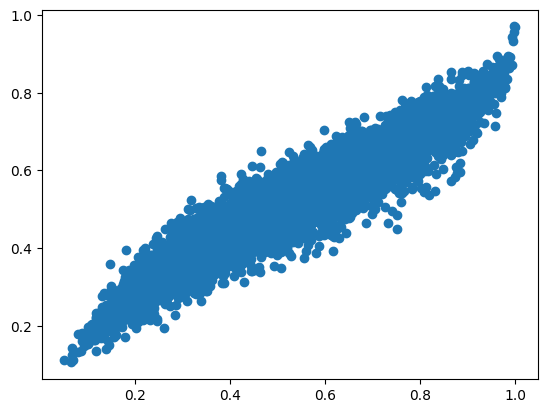

In [ ]:
#Gráfico de Dispersión
plt.figure()
plt.scatter(ydp,ys)
plt.show()

In [ ]:
#Matriz de Correlación
df=pd.DataFrame(np.column_stack((ydp,ys)))
print("La correlación es:",df.corr())


La correlación es:           0         1
0  1.000000  0.943306
1  0.943306  1.000000


In [ ]:
#Efectos Independientes
W=model.layers[0].get_weights()
print("Los efectos independintes son:\n",W)

Los efectos independintes son:
 [array([[-0.987037 ],
       [-0.905308 ],
       [-1.5297458],
       [-1.3769845],
       [-1.4678758],
       [ 1.0789337],
       [ 5.102804 ]], dtype=float32)]


<Figure size 640x480 with 0 Axes>

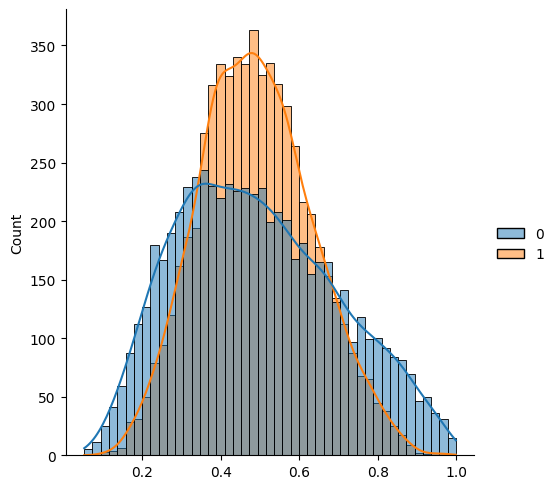

In [ ]:
#Como son las distribuciones de los datos
plt.figure()
sns.displot((ydp.flatten(),ys.flatten()),kde=True)
plt.show()

In [ ]:
#Discrepancia de las medias
dscm=(np.mean(ydp)-np.mean(ys))/np.mean(ydp)
print("La discrepancia entre medias es:",dscm*100)

La discrepancia entre medias es: 0.5549354053475319


In [ ]:
#Discrepancia entre desviaciones
dscv=(np.std(ydp)-np.std(ys))/np.std(ydp)
print("La discrepancia entre dispersiones:",dscv*100)

La discrepancia entre dispersiones: 29.681912302326374


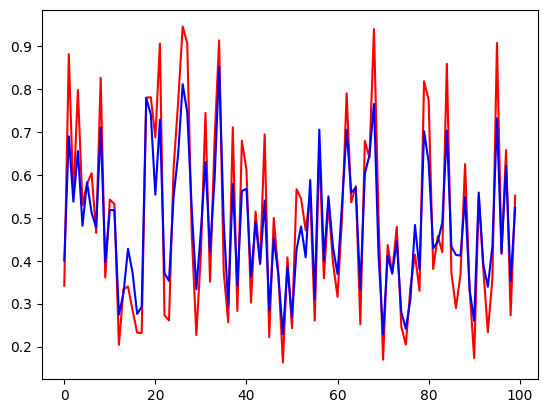

In [ ]:
#La Grafica de los datos de referencia es:
plt.figure()
plt.plot(ydp[0:100,],'r',ys[0:100,],'b') #Nada más estoy graficando 100 datos #DATOS DE REFERENCIA ROJOS Y LOS AZULES SON LOS QUE ME ARROJA EL MODELO
plt.show()

3. **Modelo MADALINE** (Multi-Adaptive Linear)

In [ ]:
yd2=np.array(XDB[['Income_n']])
yd2c=(yd2-np.mean(yd2))/np.std(yd2)
yd2p=1/1/(1+np.exp(-yd2c))

NE=7 #Definimos número de entradas
model=Sequential() #Cortex Cerebrales
model.add(Dense(10, activation='linear', use_bias=False, input_dim=NE))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')  #Mean Square Error  #Adam= la regla en descenso
history=model.fit(XDn,ydp, epochs=1000, batch_size=614)
ys=model.predict(XDn)


Epoch 1/1000
11/11 [==============================] - 1s 3ms/step - loss: 0.0783
Epoch 2/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0630
Epoch 3/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 4/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 5/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 6/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 7/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0462
Epoch 8/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0457
Epoch 9/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0452
Epoch 10/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 11/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 12/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.0437
Epoch 13/1000
11/11 [====

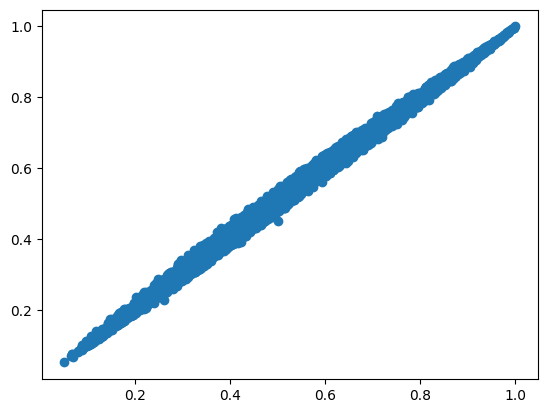

In [ ]:
#Gráfico de Dispersión
plt.figure()
plt.scatter(yd2p,ys)
plt.show()

In [ ]:
#Matriz de Correlación
df2=pd.DataFrame(np.column_stack((yd2p,ys)))
df2.corr()


,0,1
0,1.000000,0.997965
1,0.997965,1.000000


In [ ]:
#Efectos Independientes
W2=model.layers[0].get_weights()[0]
C2=model.layers[1].get_weights()[0]

print("Los efectos independientes son:\n",np.dot(W2,C2))

Los efectos independientes son:
 [[-1.7497886]
 [-0.8194077]
 [-1.5659615]
 [-1.2710032]
 [-1.6097065]
 [-1.8290861]
 [11.794545 ]]


<Figure size 640x480 with 0 Axes>

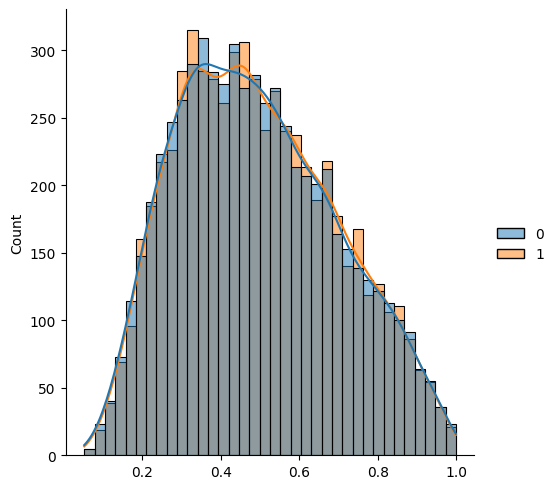

In [ ]:
#Como son las distribuciones de los datos
plt.figure()
sns.displot((yd2p.flatten(),ys.flatten()),kde=True)
plt.show()

In [ ]:
#Discrepancia de las medias
dscm2=(np.mean(yd2p)-np.mean(ys))/np.mean(yd2p)
print("La discrepancia entre medias es:",dscm2*100)

La discrepancia entre medias es: -0.4786549643733259


In [ ]:
#Discrepancia entre desviaciones
dscv2=(np.std(yd2p)-np.std(ys))/np.std(yd2p)
print("La discrepancia entre dispersiones:",dscv2*100)

La discrepancia entre dispersiones: 0.41619471863895785


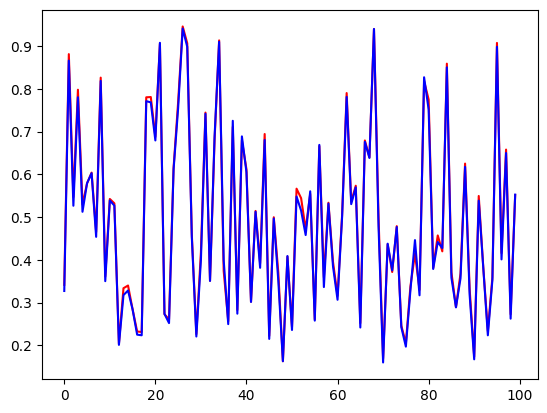

In [ ]:
#La Grafica de los datos de referencia es:
plt.figure()
plt.plot(yd2p[0:100,],'r',ys[0:100,],'b') #Nada más estoy graficando 100 datos #DATOS DE REFERENCIA ROJOS Y LOS AZULES SON LOS QUE ME ARROJA EL MODELO
plt.show()

In [ ]:
#Porcentaje de personas que poseen ingresos por encima de la media
XDB2=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analítica de Negocios/6. Taller 5 - Longitudinal Survey_Int.xlsx',sheet_name=1)
XDB2=XDB2[['Age','Mother_Edu','Father_Edu','Siblings','FamilySize','Height','Weight']]
XDB2=XDB2.dropna()

#Normalizamos los Datos
XDn2=XDB2/np.max(XD,axis=0)
yp2=model.predict(XDn2)

print("El porcentaje de los individuos que están por encima de la media es:", len(np.where(yp2>np.mean(yp2))[0]/len(yp2)))

3/3 [==============================] - 0s 4ms/step
El porcentaje de los individuos que están por encima de la media es: 39


In [ ]:
#Probabilidad de una persona especifica para que haga parte de los ingresos altos

#Individuo 1: (20 12 8 2 2 65 185)
XDi1=np.array([20, 12, 8, 2, 2, 65, 185])
#Se normalizan las variables
XDi1n=XDi1/np.max(XD,axis=0)
print("Datos normalizados del individuo 1 \n",XDi1n)
yi1=((0.90909091*-2.023058)+(0.6*-0.89059305)+(0.4*-1.6146948)+(0.11764706*-1.2491426)+(0.13333333*-1.7374382)+(0.8125*-0.11855859)+(0.49333333*10.533834))
yp1=1/(1+np.exp(-yi1))
print("La probabilidad del primer individuo para hacer parte de los ingresos altos es \n",yp1)

#Individuo 2:(25 5 5 4 6 65 150)
XDi2=np.array([25, 5, 5, 4, 6, 65, 150])
#Se normalizan las variables
XDi2n=XDi2/np.max(XD,axis=0)
print("Datos normalizados del individuo 2 \n",XDi2n)
yi2=((1.13636364*-2.023058)+(0.25*-0.89059305)+(0.25*-1.6146948)+(0.23529412*-1.2491426)+(0.4*-1.7374382)+(0.8125*-0.11855859)+(0.4*10.533834))
yp2=1/(1+np.exp(-yi2))
print("La probabilidad del segundo individuo para hacer parte de los ingresos altos es \n",yp2)

#Pesos del modelo: -2.023058 -0.89059305 -1.6146948 -1.2491426 -1.7374382 -0.11855859 10.533834

Datos normalizados del individuo 1 
 [0.90909091 0.6        0.4        0.11764706 0.13333333 0.8125
 0.49333333]
La probabilidad del primer individuo para hacer parte de los ingresos altos es 
 0.8458438589530589
Datos normalizados del individuo 2 
 [1.13636364 0.25       0.25       0.23529412 0.4        0.8125
 0.4       ]
La probabilidad del segundo individuo para hacer parte de los ingresos altos es 
 0.550591787102079


4.**Preguntas**

1. Para un total de 250 iteraciones, indicar el intervalo en el cual se ubico el coeficiente de correlación promedio para el modelo logístico ADALINE
**R/** El promedio del modelo es de 0,7877624

2. Para un total de 250 iteraciones, indicar el intervalo en el cual se ubico el coeficiente de correlación promedio para el modelo logístico MADALINE
**R/** El promedio del modelo es de 0,9900218

3. Para un total de 250 iteraciones y 5 pruebas, cual fue el modelo que logro el menor error.
**R/** El modelo que logró el menor error fue el MADALINE (1.7289e-04)

4. Indique el intervalo en el cual se ubica la discrepancia entre las medias para el modelo que logro un mejor desempeño frente al coeficiente de correlación para un total de 250 iteraciones y 5 pruebas.
**R/** El promedio de la discrepancia entre las medias del mejor modelo (MADALINE) fue de -0,07396992

5. Luego de un total de 1000 iteraciones, cuál de los dos modelos logró estabilizar el error más rápidamente.
**R/** El modelo MADALINE

6. Cual fue la variable de entrada que tuvo un mayor impacto sobre la variable de salida de acuerdo con la ejecución del modelo que tuvo un mejor comportamiento frente al coeficiente de correlación y luego de un total de 1,000 iteraciones.
**R/** En el modelo MADALINE (mejor comportamiento frente al coeficiente de correlación), la variable de entrada con mayor impacto fue "Weight" (11,754454)

7. Indicar el intervalo en el que se encuentra el porcentaje de personas que poseen ingresos por encima de la media, tomando como referencia el modelo que tuvo el mejor comportamiento frente al coeficiente de correlación luego de 1,000 iteraciones.
**R/** El porcentaje de personas que poseen ingresos por encima de la media en el modelo MADALINE es de 39.

8.
- Determinar la probabilidad de que las siguientes personas haga parte de los
ingresos altos.
             Age Mother_Edu Father_Edu Siblings FamilySize Height Weight
*Individuo 1:* 20 12 8 2 2 65 185
*Individuo 2:* 25 5 5 4 6 65 150
- En donde los pesos del modelo son los siguientes:
w1 w2 w3 w4 w5 w6 w7
-2.023058 -0.89059305 -1.6146948 -1.2491426 -1.7374382 -0.11855859 10.533834

**R/**
La probabilidad del primer individuo para hacer parte de los ingresos altos es 0.8458438589530589.
La probabilidad del segundo individuo para hacer parte de los ingresos altos es 0.550591787102079.


5. **Análisis de Resultados**

Después de ejecutado los modelos, luego de 250 interaciones el coeficiente medio de correlación de los modelos Adaline y Madaline, arrojaron 0,7877624 y 0,9900218 respectivamente. Asimismo, el modelo que logró un menor error fue el Madaline (1.7289e-04). Con base a esto, se realizó la discrepencia entre las medias para este modelo, y dio como resultado -0,07396992.

Más adelante, se ejecutaron los dos modelos, pero ahora con 1000 interacciones, y al igual que con las 250 interacciones el modelo que estabilizó el error más rápido fue el Madaline, y también este mostró un mejor comportamiento frente al coeficiente de correlación. Analizando este, se encontró que la variable de entrada con mayor impacto fue "Weight" con un impacto de 11,754454. Luego, se realizó en análisis para encontrar el porcentaje de personas que poseen ingresos por encima de la media en el mejor modelo, y este arrojó que este porcentaje sería del 39%.

Finalmente, se analizarón dos individuos para saber la probabilidad de estas personas (con ciertas características), de tener ingresos altos. Para la primera persona, el programa arrojó una probabilidad del 0.8458438589530589 (84%). Mientras, que para la segunda persona, el programa dió como resultado una probabilidad de 0.550591787102079 (55%)